In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

To download the text, you can use this code.

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt \
    -O /tmp/shakespeare.txt

--2020-11-18 17:23:06--  https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 172.217.204.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘/tmp/shakespeare.txt’

/tmp/shakespeare.tx 100%[===================>]   1.06M  --.-KB/s    in 0.01s   

2020-11-18 17:23:06 (84.1 MB/s) - ‘/tmp/shakespeare.txt’ saved [1115394/1115394]



In [4]:
tokenizer = Tokenizer()
# Now instead of hard-coding the text into a string called data, I can read it from the file like this.
data = open('/tmp/shakespeare.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'to': 3, 'i': 4, 'of': 5, 'you': 6, 'my': 7, 'a': 8, 'that': 9, 'in': 10, 'is': 11, 'not': 12, 'for': 13, 'with': 14, 'me': 15, 'it': 16, 'be': 17, 'your': 18, 'his': 19, 'but': 20, 'this': 21, 'he': 22, 'have': 23, 'as': 24, 'thou': 25, 'him': 26, 'so': 27, 'what': 28, 'thy': 29, 'will': 30, 'by': 31, 'no': 32, 'all': 33, 'king': 34, 'we': 35, 'shall': 36, 'her': 37, 'if': 38, 'our': 39, 'are': 40, 'do': 41, 'thee': 42, 'lord': 43, 'now': 44, 'on': 45, 'good': 46, 'from': 47, 'come': 48, 'sir': 49, 'or': 50, 'which': 51, 'more': 52, 'then': 53, 'at': 54, 'o': 55, 'would': 56, 'was': 57, 'they': 58, 'how': 59, 'well': 60, 'here': 61, 'she': 62, 'than': 63, 'their': 64, 'them': 65, 'duke': 66, 'am': 67, 'hath': 68, 'say': 69, 'let': 70, 'when': 71, 'one': 72, "i'll": 73, 'go': 74, 'love': 75, 'were': 76, 'may': 77, 'us': 78, 'make': 79, 'like': 80, 'upon': 81, 'yet': 82, 'richard': 83, 'there': 84, 'must': 85, 'should': 86, 'an': 87, 'first': 88, 'queen': 89, 'why':

In [5]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
print(xs[6])

[  0   0   0   0   0   0   0   0   0 139  35 969 143 668 127]


In [7]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [8]:
print(xs[5])
print(ys[5])

[  0   0   0   0   0   0   0   0   0   0 139  35 969 143 668]
[0. 0. 0. ... 0. 0. 0.]


In [9]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'to': 3, 'i': 4, 'of': 5, 'you': 6, 'my': 7, 'a': 8, 'that': 9, 'in': 10, 'is': 11, 'not': 12, 'for': 13, 'with': 14, 'me': 15, 'it': 16, 'be': 17, 'your': 18, 'his': 19, 'but': 20, 'this': 21, 'he': 22, 'have': 23, 'as': 24, 'thou': 25, 'him': 26, 'so': 27, 'what': 28, 'thy': 29, 'will': 30, 'by': 31, 'no': 32, 'all': 33, 'king': 34, 'we': 35, 'shall': 36, 'her': 37, 'if': 38, 'our': 39, 'are': 40, 'do': 41, 'thee': 42, 'lord': 43, 'now': 44, 'on': 45, 'good': 46, 'from': 47, 'come': 48, 'sir': 49, 'or': 50, 'which': 51, 'more': 52, 'then': 53, 'at': 54, 'o': 55, 'would': 56, 'was': 57, 'they': 58, 'how': 59, 'well': 60, 'here': 61, 'she': 62, 'than': 63, 'their': 64, 'them': 65, 'duke': 66, 'am': 67, 'hath': 68, 'say': 69, 'let': 70, 'when': 71, 'one': 72, "i'll": 73, 'go': 74, 'love': 75, 'were': 76, 'may': 77, 'us': 78, 'make': 79, 'like': 80, 'upon': 81, 'yet': 82, 'richard': 83, 'there': 84, 'must': 85, 'should': 86, 'an': 87, 'first': 88, 'queen': 89, 'why':

I have updated the model a little bit to make it work better with a larger corpus of work but please feel free to experiment with these hyper-parameters. Three things that you can experiment with:
1. First, is the dimensionality of the embedding, 100 is purely arbitrary and I'd love to hear what type of results you will get with different values.
2. Similarly, I increased the number of LSTM units to 150. Again, you can try different values or you can see how it behaves if you remove the bidirectional. Perhaps you want words only to have forward meaning, where (big dog) makes sense but (dog big) doesn't make so much sense.
3. Perhaps the biggest impact is on the optimizer. Instead of just hard coding `Adam` as my optimizer this time and getting the defaults, I've now created my own `Adam` optimizer and set the learning rate on it. Try experimenting with different values here and see the impact that they have on convergence. In particular, see how different convergences can create different text.

And of course, training for different epochs will always have an impact with more generally being better but eventually you'll hit the law of diminishing returns.

In [10]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256)))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
print(model)

Epoch 1/10
5354/5354 [==============================] - 178s 33ms/step - loss: 9.3049 - accuracy: 0.0118
Epoch 2/10
5354/5354 [==============================] - 179s 33ms/step - loss: 10.0030 - accuracy: 0.0110
Epoch 3/10
5354/5354 [==============================] - 180s 34ms/step - loss: 10.0678 - accuracy: 0.0124
Epoch 4/10
5354/5354 [==============================] - 179s 33ms/step - loss: 8.8698 - accuracy: 0.0216
Epoch 5/10
5354/5354 [==============================] - 178s 33ms/step - loss: 8.0412 - accuracy: 0.0311
Epoch 6/10
5354/5354 [==============================] - 178s 33ms/step - loss: 7.6826 - accuracy: 0.0380
Epoch 7/10
5354/5354 [==============================] - 177s 33ms/step - loss: 7.2874 - accuracy: 0.0435
Epoch 8/10
5354/5354 [==============================] - 178s 33ms/step - loss: 7.3338 - accuracy: 0.0430
Epoch 9/10
5354/5354 [==============================] - 184s 34ms/step - loss: 6.9636 - accuracy: 0.0473
Epoch 10/10
5354/5354 [==============================

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

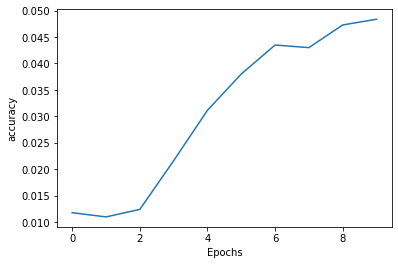

In [12]:
plot_graphs(history, 'accuracy')


In [ ]:
plot_graphs(history, 'loss')

In [13]:
seed_text = "I've got a good feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a good feeling about this the king to the king to the king you you you you you you lagging you you collected you you you you afterward physical you you you you you you you you you you you you you you you physical physical quired quired quired quired quired you physical physical you you you you you toil'd you you you you you you you you tinder quired quired quired quired silenced countervail quired you you you you you you you you you you you you you hearty you you you you you you you you you you you you you you physical


Now, this approach works very well until you have very large bodies of text with many many words. So for example, you could try the complete works of Shakespeare and you'll likely hit memory errors, as assigning the one-hot encodings of the labels to matrices that have over 31,477 elements, which is the number of unique words in the collection, and there are over 15 million sequences generated using the algorithm that we showed here. So the labels alone would require the storage of many terabytes of RAM.

So for your next task, you'll go through a workbook by yourself that uses character-based prediction. The full number of unique characters in a corpus is far less than the full number of unique words, at least in English. So the same principles that you use to predict words can be used to apply here. The workbook is at [this URL](https://www.tensorflow.org/tutorials/text/text_generation), so try it out, and once you've done, that you'll be ready for this week's final exercise.